In [1]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
df = pd.read_csv('datasets/air_quality/BeijingPM25_0.csv')

In [3]:
df.head()

,ds,y
0,2010-01-02 00:00:00,129.0
1,2010-01-02 01:00:00,148.0
2,2010-01-02 02:00:00,159.0
3,2010-01-02 03:00:00,181.0
4,2010-01-02 04:00:00,138.0


<Axes: xlabel='ds'>

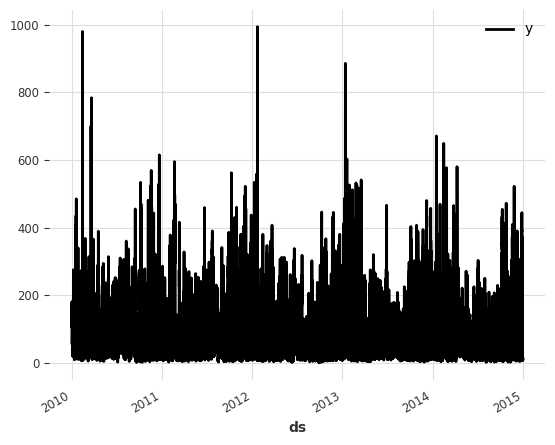

In [4]:


target_series = TimeSeries.from_dataframe(df, 'ds', 'y')


target_series.plot()

In [5]:
num_test = 24
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]
#num_val = num_test*1
#target_series_train, target_series_val = target_series_train[:-num_val], target_series_train[-num_val:]

<Axes: xlabel='ds'>

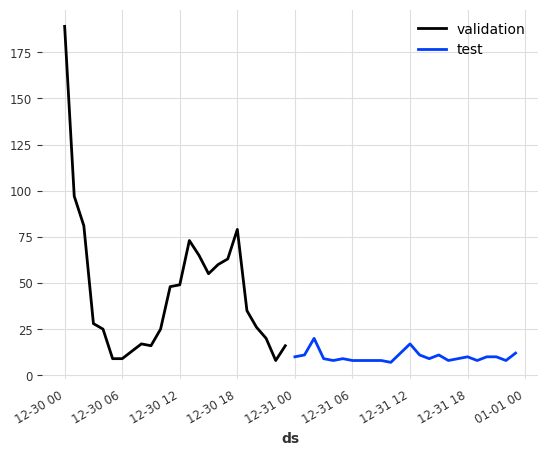

In [9]:
#target_series_val.plot(label='validation')
target_series_test.plot(label='test')

In [6]:
n_lags = 24*7
model = LightGBMModel(lags=n_lags, output_chunk_length=num_test)

In [7]:
model.fit(series=target_series_train)

ValueError: Specified series do not share any common times for which features can be created.


ValueError: Specified series do not share any common times for which features can be created.

In [ ]:
target_series_test_pred = model.predict(num_test)

In [ ]:
#target_series_train.plot(label='training')
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)